In [2]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [3]:
train = pd.read_csv("train.csv", encoding = 'utf-8')
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train.shape

(8693, 14)

In [7]:
test = pd.read_csv("test.csv", encoding = 'utf-8')
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
test.shape

(4277, 13)

## Целевая переменная  - **Transported**

In [11]:
train['Transported'].describe()

count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object

Изменим тип целевой перемнной

In [12]:
train["Transported"] = train["Transported"]*1


In [13]:
train["Transported"].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='count'>

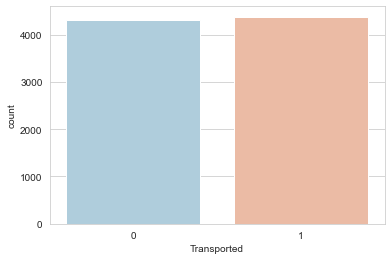

In [14]:
sns.set_style('whitegrid')
sns.countplot(x="Transported",data=train,palette='RdBu_r')

Видим, что выживаемость составила примерно 50%

# Переменная признак - PassengerId 


In [15]:
train['PassengerId'].count()

8693

In [16]:
test['PassengerId'].count()

4277

# Переменная признак - HomePlanet

In [17]:
train['HomePlanet'].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [18]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [19]:
test['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

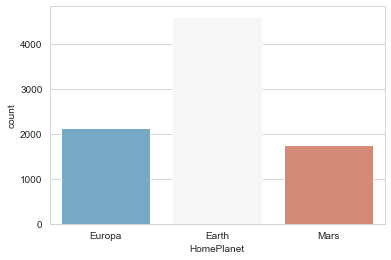

In [20]:
sns.set_style('whitegrid')
sns.countplot(x="HomePlanet",data=train,palette='RdBu_r')

Посмотрим есть ли взаимосвязь места отправки и выживаемостью

In [21]:
train.groupby(['HomePlanet']) ["Transported"].value_counts(normalize=True)

HomePlanet  Transported
Earth       0              0.576054
            1              0.423946
Europa      1              0.658846
            0              0.341154
Mars        1              0.523024
            0              0.476976
Name: Transported, dtype: float64

In [22]:
train.groupby(train['HomePlanet'].isnull()).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,,,,,,,
False,28.828743,225.201034,462.756828,174.477626,313.029596,305.334979,0.503415
True,28.793970,202.789744,262.638191,141.742268,231.762626,284.915000,0.512438


Из таблицы видим, что выжившие есть как из заполенных и не заполенных HomePlanet, то есть эта переменая влияет на целевую.


Заполним пропуски самым популярным значением

In [23]:
train = train.fillna({'HomePlanet': 'Earth'})
test = test.fillna({'HomePlanet': 'Earth'})

In [24]:
train['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [25]:
test['HomePlanet'].value_counts()

Earth     2350
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

# Переменная признак - CryoSleep

In [26]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

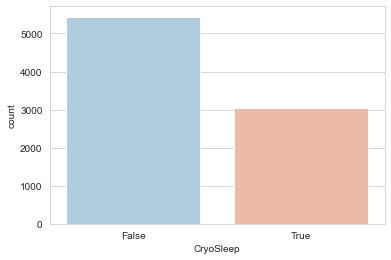

In [27]:
sns.set_style('whitegrid')
sns.countplot(x="CryoSleep",data=train,palette='RdBu_r')

In [28]:
mode = train['CryoSleep'].mode()
mode

0    False
dtype: object

In [29]:
train = train.fillna({'CryoSleep': False})
test = test.fillna({'CryoSleep': False})

In [30]:
train['CryoSleep'].value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [31]:
test['CryoSleep'].value_counts()

False    2733
True     1544
Name: CryoSleep, dtype: int64

# Переменная признак - Cabin

In [32]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

 Разделим данную переменную на 3 переменные, но для начала заполним пропуски популярным значением

In [33]:
mode = train['Cabin'].mode()
mode

0    G/734/S
dtype: object

In [34]:
train = train.fillna({'Cabin': 'G/734/S'})
test = test.fillna({'Cabin': 'G/734/S'})

In [35]:
train['Cabin_type']=train['Cabin'].str.split('/').str[0] 
test['Cabin_type']=test['Cabin'].str.split('/').str[0] 

In [36]:
train['Cabin_type'].value_counts()

F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_type, dtype: int64

In [37]:
test['Cabin_type'].value_counts()

F    1445
G    1322
E     447
B     362
C     355
D     242
A      98
T       6
Name: Cabin_type, dtype: int64

<AxesSubplot:xlabel='Cabin_type', ylabel='count'>

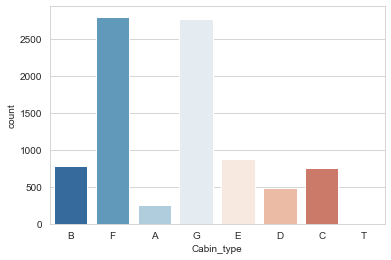

In [38]:
sns.set_style('whitegrid')
sns.countplot(x="Cabin_type",data=train,palette='RdBu_r')

In [39]:
train['Cabin_num']=train['Cabin'].str.split('/').str[1] 
test['Cabin_num']=test['Cabin'].str.split('/').str[1] 
train['Cabin_num'].astype(int)

0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: Cabin_num, Length: 8693, dtype: int32

In [40]:
test['Cabin_num'].value_counts()

734     104
4        21
31       18
197      16
294      16
       ... 
1170      1
904       1
1174      1
356       1
1503      1
Name: Cabin_num, Length: 1505, dtype: int64

In [41]:
train['Cabin_cat']=train['Cabin'].str.split('/').str[2] 
test['Cabin_cat']=test['Cabin'].str.split('/').str[2] 
train['Cabin_cat'].value_counts()

S    4487
P    4206
Name: Cabin_cat, dtype: int64

<AxesSubplot:xlabel='Cabin_cat', ylabel='count'>

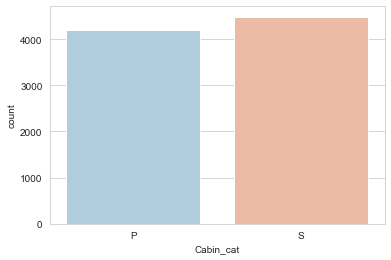

In [42]:
sns.set_style('whitegrid')
sns.countplot(x="Cabin_cat",data=train,palette='RdBu_r')

In [43]:
test['Cabin_cat'].value_counts()

S    2193
P    2084
Name: Cabin_cat, dtype: int64

# Переменная признак - Destination

In [44]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

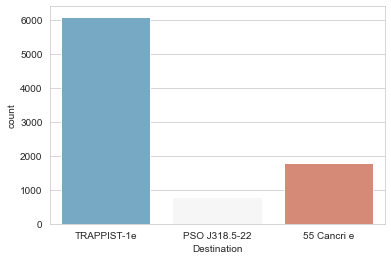

In [49]:
sns.set_style('whitegrid')
sns.countplot(x="Destination",data=train,palette='RdBu_r')

In [45]:
mode = train['Destination'].mode()
mode

0    TRAPPIST-1e
dtype: object

In [46]:
train = train.fillna({'Destination': 'TRAPPIST-1e'})
test = test.fillna({'Destination': 'TRAPPIST-1e'})

In [47]:
train['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [48]:
test['Destination'].value_counts()

TRAPPIST-1e      3048
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

# Переменная признак - Age

In [53]:
train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [54]:
test['Age'].describe()

count    4186.000000
mean       28.658146
std        14.179072
min         0.000000
25%        19.000000
50%        26.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [55]:
def age_group(x):
    if x in range(0,20):
        return 1
    if x in range(20,40):
        return 2
    if x in range(40,60):
        return 3
    if x in range(60,90):
        return 4

In [56]:
train['Age_group'] = train['Age'].apply(lambda x: age_group(x))

In [57]:
train.groupby(train['Age_group']).mean()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age_group,,,,,,,,
1.0,0.431881,12.092215,133.945394,108.482775,128.127488,127.499290,94.346939,0.588971
2.0,0.314877,28.155437,259.254030,542.240337,194.091781,337.024590,373.367407,0.465199
3.0,0.326480,47.477882,249.443102,676.168897,184.534943,433.767132,393.060179,0.502181
4.0,0.326772,65.074803,265.508000,601.469880,184.300813,605.298805,335.803213,0.468504


In [58]:
train.groupby(train['Age'].isnull()).mean()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group
Age,,,,,,,,,
False,0.347075,28.82793,225.924406,458.946971,175.242720,310.269443,305.361465,0.503641,1.994715
True,0.458101,NaN,166.780899,416.651429,101.857143,351.831461,280.737143,0.502793,NaN


По таблице видим, что группа данныхь с незаполненным возрастом более близка к людям из 1ой возрастной группы (младше 20 лет)

In [59]:
train = train.fillna({'Age': 20})
test = test.fillna({'Age': 20})


In [60]:
train = train.fillna({'Age_group': 1})
test = test.fillna({'Age_group': 1})

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной Age')

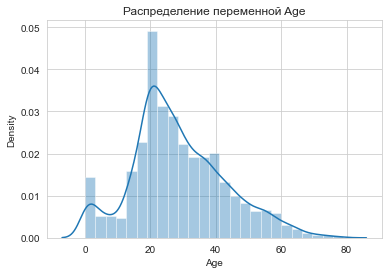

In [61]:
sns.distplot(train['Age'], bins = 25)
plt.title('Распределение переменной Age')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной Age')

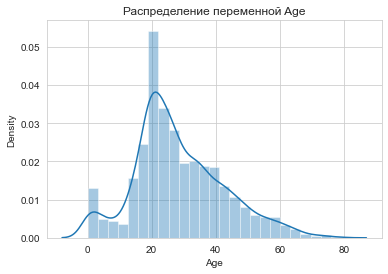

In [62]:
sns.distplot(test['Age'], bins = 25)
plt.title('Распределение переменной Age')

In [63]:
train['Age'].describe()

count    8693.000000
mean       28.646152
std        14.393761
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

# Переменная признак - VIP

In [64]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<AxesSubplot:xlabel='VIP', ylabel='count'>

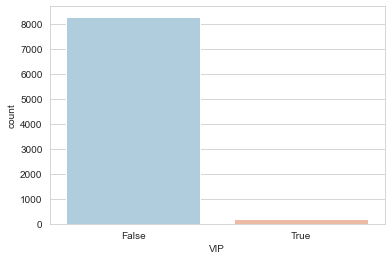

In [65]:
sns.set_style('whitegrid')
sns.countplot(x="VIP",data=train,palette='RdBu_r')

<AxesSubplot:xlabel='VIP', ylabel='count'>

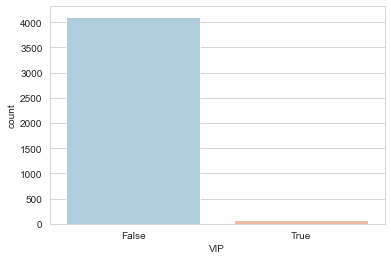

In [66]:
sns.set_style('whitegrid')
sns.countplot(x="VIP",data=test,palette='RdBu_r')

In [67]:
mode = train['VIP'].mode()
mode

0    False
dtype: object

In [68]:
train = train.fillna({'VIP': False})
test = test.fillna({'VIP': False})

In [69]:
train['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

# Переменная признак - RoomService	

In [70]:
train['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [71]:
test['RoomService'].describe()

count     4195.000000
mean       219.266269
std        607.011289
min          0.000000
25%          0.000000
50%          0.000000
75%         53.000000
max      11567.000000
Name: RoomService, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной RoomService')

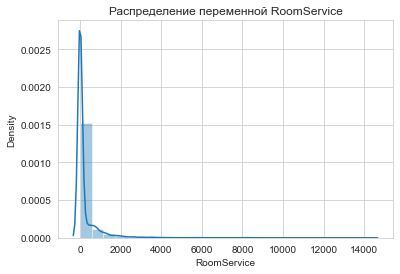

In [72]:
sns.distplot(train['RoomService'], bins = 25)
plt.title('Распределение переменной RoomService')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной RoomService')

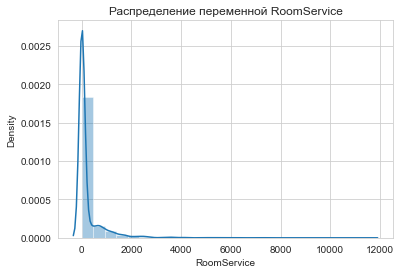

In [73]:
sns.distplot(test['RoomService'], bins = 25)
plt.title('Распределение переменной RoomService')

In [74]:
train = train.fillna({'RoomService': 225})
test = test.fillna({'RoomService': 219})

In [75]:
train['RoomService'].describe()


count     8693.000000
mean       224.694122
std        659.739365
min          0.000000
25%          0.000000
50%          0.000000
75%         78.000000
max      14327.000000
Name: RoomService, dtype: float64

In [76]:
test['RoomService'].describe()

count     4277.000000
mean       219.261164
std        601.162848
min          0.000000
25%          0.000000
50%          0.000000
75%         79.000000
max      11567.000000
Name: RoomService, dtype: float64

# Переменная признак - FoodCourt

In [77]:
train['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [78]:
test['FoodCourt'].describe()

count     4171.000000
mean       439.484296
std       1527.663045
min          0.000000
25%          0.000000
50%          0.000000
75%         78.000000
max      25273.000000
Name: FoodCourt, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной FoodCourt')

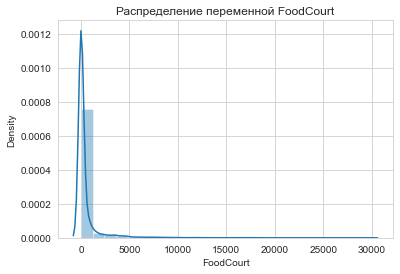

In [79]:
sns.distplot(train['FoodCourt'], bins = 25)
plt.title('Распределение переменной FoodCourt')

In [80]:
train = train.fillna({'FoodCourt': 458})
test = test.fillna({'FoodCourt': 439})

In [81]:
train['FoodCourt'].describe()

count     8693.000000
mean       458.075578
std       1594.434978
min          0.000000
25%          0.000000
50%          0.000000
75%        118.000000
max      29813.000000
Name: FoodCourt, dtype: float64

# Переменная признак - ShoppingMall

In [82]:
train['ShoppingMall'].describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [83]:
test['ShoppingMall'].describe()

count    4179.000000
mean      177.295525
std       560.821123
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max      8292.000000
Name: ShoppingMall, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной ShoppingMall')

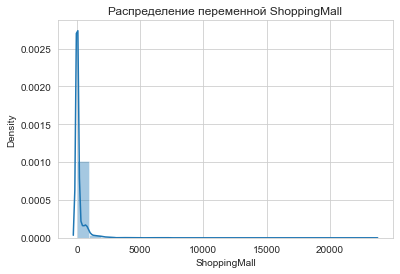

In [84]:
sns.distplot(train['ShoppingMall'], bins = 25)
plt.title('Распределение переменной ShoppingMall')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной ShoppingMall')

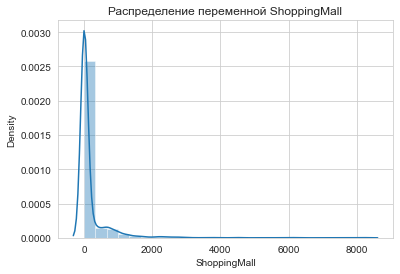

In [85]:
sns.distplot(test['ShoppingMall'], bins = 25)
plt.title('Распределение переменной ShoppingMall')

In [86]:
train = train.fillna({'ShoppingMall': 173})
test = test.fillna({'ShoppingMall': 177})

In [87]:
train['ShoppingMall'].describe()

count     8693.000000
mean       173.711722
std        597.417450
min          0.000000
25%          0.000000
50%          0.000000
75%         45.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [88]:
test['ShoppingMall'].describe()

count    4277.000000
mean      177.288754
std       554.357253
min         0.000000
25%         0.000000
50%         0.000000
75%        51.000000
max      8292.000000
Name: ShoppingMall, dtype: float64

# Переменная признак - Spa

In [89]:
train['Spa'].describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

In [90]:
test['Spa'].describe()

count     4176.000000
mean       303.052443
std       1117.186015
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      19844.000000
Name: Spa, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной Spa')

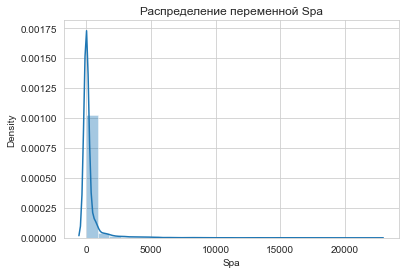

In [91]:
sns.distplot(train['Spa'], bins = 25)
plt.title('Распределение переменной Spa')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной Spa')

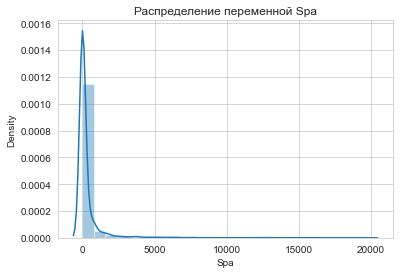

In [92]:
sns.distplot(test['Spa'], bins = 25)
plt.title('Распределение переменной Spa')

In [93]:
train = train.fillna({'Spa': 311})
test = test.fillna({'Spa': 303})

In [94]:
train['Spa'].describe()

count     8693.000000
mean       311.135856
std       1124.675871
min          0.000000
25%          0.000000
50%          0.000000
75%         89.000000
max      22408.000000
Name: Spa, dtype: float64

In [95]:
test['Spa'].describe()

count     4277.000000
mean       303.051204
std       1103.913087
min          0.000000
25%          0.000000
50%          0.000000
75%         83.000000
max      19844.000000
Name: Spa, dtype: float64

# Переменная признак - VRDeck

In [96]:
train['VRDeck'].describe()

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [97]:
test['VRDeck'].describe()

count     4197.000000
mean       310.710031
std       1246.994742
min          0.000000
25%          0.000000
50%          0.000000
75%         36.000000
max      22272.000000
Name: VRDeck, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной VRDeck')

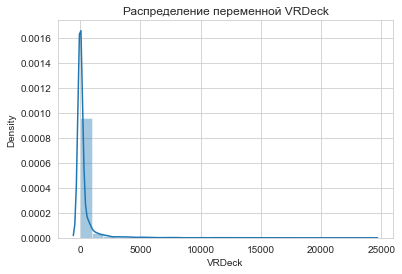

In [98]:
sns.distplot(train['VRDeck'], bins = 25)
plt.title('Распределение переменной VRDeck')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение переменной VRDeck')

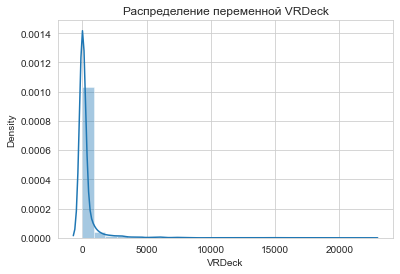

In [99]:
sns.distplot(test['VRDeck'], bins = 25)
plt.title('Распределение переменной VRDeck')

In [100]:
train = train.fillna({'VRDeck': 305})
test = test.fillna({'VRDeck': 310})

In [101]:
train['VRDeck'].describe()

count     8693.000000
mean       304.857932
std       1133.259049
min          0.000000
25%          0.000000
50%          0.000000
75%         71.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [102]:
test['VRDeck'].describe()

count     4277.00000
mean       310.69675
std       1235.27461
min          0.00000
25%          0.00000
50%          0.00000
75%         53.00000
max      22272.00000
Name: VRDeck, dtype: float64

In [103]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.646152,224.694122,458.075578,173.711722,311.135856,304.857932,0.503624,1.974232
std,14.393761,659.739365,1594.434978,597.417450,1124.675871,1133.259049,0.500016,0.754815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,4.000000


In [104]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.00000
mean,28.473930,219.261164,439.472294,177.288754,303.051204,310.69675
std,14.082929,601.162848,1508.609203,554.357253,1103.913087,1235.27461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,37.000000,79.000000,143.000000,51.000000,83.000000,53.00000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.00000


# Cформируем датасет для обучения

In [106]:
col =train.columns
col

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Cabin_type', 'Cabin_num', 'Cabin_cat',
       'Age_group'],
      dtype='object')

In [107]:
cat_cols = ['HomePlanet', 'Cabin_type', 'Cabin_cat', 'Destination', 'VIP']
continuos_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int32  
 14  Cabin_type    8693 non-null   object 
 15  Cabin_num     8693 non-null   object 
 16  Cabin_cat     8693 non-null   object 
 17  Age_group     8693 non-null   float64
dtypes: bool(2), float64(7), int3

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns='Transported'), 
                                                    train['Transported'], test_size=0.3)

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


In [111]:
continuos_transformers = []
cat_transformers = []

for cont_col in continuos_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', ColumnSelector(key=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    cat_transformers.append((cat_col, cat_transformer))


In [112]:
continuos_transformers

[('Age',
  Pipeline(steps=[('selector', NumberSelector(key='Age')),
                  ('standard', StandardScaler())])),
 ('RoomService',
  Pipeline(steps=[('selector', NumberSelector(key='RoomService')),
                  ('standard', StandardScaler())])),
 ('FoodCourt',
  Pipeline(steps=[('selector', NumberSelector(key='FoodCourt')),
                  ('standard', StandardScaler())])),
 ('ShoppingMall',
  Pipeline(steps=[('selector', NumberSelector(key='ShoppingMall')),
                  ('standard', StandardScaler())])),
 ('Spa',
  Pipeline(steps=[('selector', NumberSelector(key='Spa')),
                  ('standard', StandardScaler())])),
 ('VRDeck',
  Pipeline(steps=[('selector', NumberSelector(key='VRDeck')),
                  ('standard', StandardScaler())]))]

In [113]:

from sklearn.pipeline import FeatureUnion
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

feats = FeatureUnion(continuos_transformers+cat_transformers)
feature_processing = Pipeline([('feats', feats)])

feature_processing

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('Age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Age')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('RoomService',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='RoomService')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('FoodCourt',
                                                 Pipeline(steps=[('selector',
                              

In [114]:
feature_processing.fit_transform(X_train)

array([[-1.72367688, -0.34195947, -0.29316103, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.15435042, -0.34195947, -0.29316103, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.78035952, -0.34195947, -0.29316103, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.16722434, -0.34195947, -0.29316103, ...,  1.        ,
         1.        ,  0.        ],
       [-1.09766778,  3.16370344, -0.27286877, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22390699, -0.34195947, -0.29316103, ...,  1.        ,
         1.        ,  0.        ]])

In [115]:
feature_processing.fit_transform(X_val)

array([[-0.36959701, -0.31607247,  0.1178775 , ...,  1.        ,
         1.        ,  0.        ],
       [-1.82533874, -0.33882842, -0.27700594, ...,  1.        ,
         1.        ,  0.        ],
       [-0.23095494, -0.33882842, -0.27700594, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-1.40941253, -0.33882842, -0.27700594, ...,  1.        ,
         1.        ,  0.        ],
       [-1.96398081, -0.33882842, -0.27700594, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87818162, -0.23784892, -0.27700594, ...,  1.        ,
         1.        ,  0.        ]])

In [136]:
classifier_GB = Pipeline([
    ('features', feats),
    ('classifier', GradientBoostingClassifier(random_state=42)),
])

In [137]:
classifier_GB.fit(X_train, y_train)
y_score_GB = classifier_GB.predict_proba(X_val)[:, 1]
y_score_GB

array([0.64010927, 0.93575969, 0.90933128, ..., 0.96628109, 0.71405093,
       0.69386407])

In [139]:
b = 1
precision_GB, recall_GB, threshold_GB = precision_recall_curve(y_val.values, y_score_GB)
fscore_GB = (1 +b**2) * (precision_GB * recall_GB) / (b**2 * precision_GB + recall_GB)
ix = np.argmax(fscore_GB)
print(f'F-Score={fscore_GB[ix]:.3f}, Precision={precision_GB[ix]:.3f}, Recall={recall_GB[ix]:.3f}')
print('Best threshhold', threshold_GB[ix])

F-Score=0.805, Precision=0.743, Recall=0.879
Best threshhold 0.3814304361884661


In [140]:
ROC_AUC_GB = roc_auc_score(y_val, classifier_GB.predict_proba(X_val)[:, 1])
# locate the index of the largest f score
print(f'ROC_AUC= {ROC_AUC_GB:.3f}')

ROC_AUC= 0.878


In [148]:
y_score_GB = classifier_GB.predict_proba(test)[:, 1]
y_score_GB

array([0.71555635, 0.06056315, 0.98479739, ..., 0.90817372, 0.7927457 ,
       0.71555635])

In [149]:
prediction = pd.DataFrame(y_score_GB, columns = ['prediction'])
prediction

,prediction
0,0.715556
1,0.060563
2,0.984797
3,0.976316
4,0.615492
...,...
4272,0.715556
4273,0.423654
4274,0.908174
4275,0.792746


In [150]:
prediction['Transported'] = [True if x> 0.3814304361884661 else False for x in prediction['prediction']]

In [151]:
prediction.head()

,prediction,Transported
0,0.715556,True
1,0.060563,False
2,0.984797,True
3,0.976316,True
4,0.615492,True
